Импортируем необходимые библиотеки

In [634]:
# Импортируем библиотеку pandas для работы с табличными данными
import pandas as pd
# Импортируем библиотеку numpy для работы с массивами данных
import numpy as np
# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt
# Импортируем библиотеку seaborn для более красивых графиков
import seaborn as sns
# Импортируем модуль os для работы с файловой системой
import os

Импортируем функции из scikit-learn

In [635]:
from sklearn.model_selection import train_test_split # Для разделения данных
from sklearn.dummy import DummyClassifier # Для создания бейзлайна
from sklearn.linear_model import LogisticRegression # Для логистической регрессии
from sklearn.pipeline import Pipeline # Для создания конвейера
from sklearn.preprocessing import StandardScaler # Для стандартизации
from sklearn.metrics import accuracy_score, roc_auc_score # Для оценки качества
from sklearn.model_selection import GridSearchCV # Импорт для подбора гиперпараметров
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve # Импорт для построения ROC-кривой

Загружаем датасет

In [636]:
dataset_path=os.path.abspath(os.path.join("..","..","dataset","S05-hw-dataset.csv"))
print (dataset_path)
df = pd.read_csv(dataset_path)

c:\Users\Юля\Desktop\ИИИ\Gorbacheva_Julia_III\dataset\S05-hw-dataset.csv


Выводим первые строки датасета

In [637]:
print("Первые 5 строк датасета:")
print(df.head())

Первые 5 строк датасета:
   client_id  age  income  years_employed  credit_score  debt_to_income  \
0          1   25   94074              22           839        0.547339   
1          2   58   51884              26           565        0.290882   
2          3   53   48656              39           561        0.522340   
3          4   42   81492              30           582        0.709123   
4          5   42   94713               8           642        0.793392   

   num_credit_cards  num_late_payments  has_mortgage  has_car_loan  \
0                 1                  7             0             0   
1                 1                  1             0             1   
2                 1                 13             0             0   
3                 2                 10             1             1   
4                 3                  3             0             0   

   savings_balance  checking_balance  region_risk_score  \
0            26057              5229        

Выводим информацию о столбцах и типах

In [638]:
print("Информация о датасете (типы данных и количество ненулевых значений):")
print(df.info())

Информация о датасете (типы данных и количество ненулевых значений):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance          

Выводим базовые описательные статистики для числовых столбцов

In [639]:
print("Описательные статистики для числовых признаков:")
print(df.describe())

Описательные статистики для числовых признаков:
         client_id          age         income  years_employed  credit_score  \
count  3000.000000  3000.000000    3000.000000     3000.000000   3000.000000   
mean   1500.500000    45.059667   69658.992000       19.577667    649.285333   
std     866.169729    14.192883   24742.235182       11.381497     69.955852   
min       1.000000    21.000000   15000.000000        0.000000    402.000000   
25%     750.750000    33.000000   52641.750000       10.000000    604.000000   
50%    1500.500000    45.000000   69784.500000       20.000000    647.000000   
75%    2250.250000    57.000000   85874.250000       29.000000    697.000000   
max    3000.000000    69.000000  156351.000000       39.000000    850.000000   

       debt_to_income  num_credit_cards  num_late_payments  has_mortgage  \
count     3000.000000       3000.000000        3000.000000   3000.000000   
mean         0.284065          3.494667           6.869333      0.495000   
std

Выводим распределение целевого признака

In [640]:
# Считаем количество уникальных значений в столбце 'default' и выводим
print("Распределение целевого признака 'default':")
print(df['default'].value_counts()) # value_counts()
# Считаем процентное соотношение этих значений
print("\nПроцентное соотношение:")
print(df['default'].value_counts(normalize=True)) #и value_counts(normalize=True)

Распределение целевого признака 'default':
default
0    1769
1    1231
Name: count, dtype: int64

Процентное соотношение:
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


Фиксируем наблюдения

In [641]:
num_rows, num_cols = df.shape
print(f"Размер датасета: {num_rows} строк (объектов), {num_cols} столбцов (всего).")
print(f"Количество признаков (исключая 'client_id' и 'default'): {num_cols - 2}")
# Создаем пустой список для потенциальных аномалий
anomalies = []
# Проверяем, есть ли отрицательные значения в столбце 'age'
if (df['age'] < 0).any():
    # Если есть, добавляем описание аномалии в список
    anomalies.append("Найдены отрицательные значения в 'age'.")
# Проверяем, есть ли отрицательные значения в столбце 'income'
if (df['income'] < 0).any():
    anomalies.append("Найдены отрицательные значения в 'income'.")
# Проверяем, находятся ли значения в 'debt_to_income' вне допустимого диапазона [0, 1]
if (df['debt_to_income'] < 0).any() or (df['debt_to_income'] > 1).any():
    anomalies.append("Найдены значения вне диапазона [0, 1] в 'debt_to_income'.")
# Если список аномалий не пустой, выводим его содержимое
if anomalies:
    print("Явные аномалии:")
    for anomaly in anomalies:
        print(f"- {anomaly}")
else:
    # Если список пустой, сообщаем, что аномалий не найдено
    print("Явных аномалий не обнаружено.")
# Считаем долю каждого класса в 'default'
class_distribution = df['default'].value_counts(normalize=True)
# Проверяем, является ли распределение балансированным (разница менее 10%)
balanced = abs(class_distribution.get(0, 0) - class_distribution.get(1, 0)) < 0.1
# Выводим результат проверки баланса
if balanced:
    print("Распределение целевого признака ('default') близко к сбалансированному.")
else:
    print("Распределение целевого признака ('default') несбалансировано.")

Размер датасета: 3000 строк (объектов), 17 столбцов (всего).
Количество признаков (исключая 'client_id' и 'default'): 15
Явных аномалий не обнаружено.
Распределение целевого признака ('default') несбалансировано.


Выделяем матрицу признаков `X` и вектор таргета `y`

In [642]:
y = df['default'] # вектор таргета y
X = df.drop(columns=['client_id', 'default']) # матрица признаков X
print("Размерность X (матрица признаков):", X.shape)
print("Размерность y (вектор таргета):", y.shape)
print("\nСтолбцы в X (матрица признаков):")
print(X.columns.tolist())

Размерность X (матрица признаков): (3000, 15)
Размерность y (вектор таргета): (3000,)

Столбцы в X (матрица признаков):
['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']


Проверяем наличие в матрице `X` только числовых признаков

In [643]:
# Считаем общее количество признаков в X (столбцов)
total_features_count = X.shape[1] # shape[1] - количество столбцов
# Считаем количество числовых признаков в X
numeric_features_only = X.select_dtypes(include=[np.number])
numeric_features_count = numeric_features_only.shape[1] # количество столбцов в отфильтрованном фрейме
# Выводим результаты сравнения
print(f"Общее количество признаков в X: {total_features_count}")
print(f"Количество числовых признаков в X: {numeric_features_count}")
# Делаем вывод на основе сравнения
if total_features_count == numeric_features_count:
    print("Вывод: Все признаки в матрице X являются числовыми. Предобработка не требуется.")
else:
    print(f"Внимание: Обнаружено {total_features_count - numeric_features_count} некорректных (не числовых) признаков в X.")

Общее количество признаков в X: 15
Количество числовых признаков в X: 15
Вывод: Все признаки в матрице X являются числовыми. Предобработка не требуется.


Проверяем нахождение `debt_to_income` в числовом диапазоне [0,1]

In [644]:
if 'debt_to_income' in X.columns:
    debt_min = X['debt_to_income'].min()
    debt_max = X['debt_to_income'].max()
    print(f"\nДиапазон 'debt_to_income': от {debt_min} до {debt_max}")
    if not (0 <= debt_min <= 1 and 0 <= debt_max <= 1):
        print("ВНИМАНИЕ: 'debt_to_income' выходит за диапазон [0, 1]")
    else:
        print("Вывод: 'debt_to_income' находится в ожидаемом диапазоне [0, 1].")


Диапазон 'debt_to_income': от 0.0061471149847966 до 0.878343349584274
Вывод: 'debt_to_income' находится в ожидаемом диапазоне [0, 1].


Разделяем данные на обучающую и тестовую выборки

In [645]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # test_size=0.2, random_state=42, stratify=y
)
# Выводим размеры получившихся выборок
print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")
print(f"Размерность y_train: {y_train.shape}")
print(f"Размерность y_test: {y_test.shape}")
# Проверим баланс классов в обучающей и тестовой выборках (дополнительная проверка)
print("\nБаланс классов в y_train:")
print(y_train.value_counts(normalize=True))
print("\nБаланс классов в y_test:")
print(y_test.value_counts(normalize=True))

Размерность X_train: (2400, 15)
Размерность X_test: (600, 15)
Размерность y_train: (2400,)
Размерность y_test: (600,)

Баланс классов в y_train:
default
0    0.589583
1    0.410417
Name: proportion, dtype: float64

Баланс классов в y_test:
default
0    0.59
1    0.41
Name: proportion, dtype: float64


Строим бэйзлайн-модель

In [646]:
# Создаём бейзлайн-классификатор
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42) # strategy='most_frequent', random_state=42
# Обучаем бейзлайн на обучающей выборке X_train и y_train
baseline_model.fit(X_train, y_train) # fit(X_train, y_train)

,strategy,'most_frequent'
,random_state,42
,constant,None


Оцениваем бейзлайн

In [647]:
# Получаем предсказания на тестовой выборке X_test
y_pred_baseline = baseline_model.predict(X_test)
# Вычисляем Accuracy (долю правильных ответов) на тестовой выборке
acc_baseline = accuracy_score(y_test, y_pred_baseline) # accuracy на тесте
# Вычисляем ROC-AUC
baseline_model_auc = DummyClassifier(strategy='stratified', random_state=42)
baseline_model_auc.fit(X_train, y_train)
y_pred_proba_baseline_auc = baseline_model_auc.predict_proba(X_test)[:, 1] # Вероятность положительного класса
auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline_auc) # ROC-AUC на тесте

Выводим значения метрик и коротко комментируем, что делает бейзлайн и почему важно иметь точку отсчёта

In [648]:
print("Результаты бейзлайн-модели (strategy='most_frequent')")
print(f"Accuracy (Most Frequent Baseline): {acc_baseline:.4f}") # <-- Вывод значения accuracy
print(f"ROC-AUC (Stratified Baseline для AUC): {auc_baseline:.4f}") # <-- Вывод значения ROC-AUC
print("\nКомментарий к бейзлайну")
print("Бейзлайн-модель (DummyClassifier) с 'strategy=\"most_frequent\"' всегда предсказывает класс,")
print("который чаще встречается в обучающей выборке (в данном случае это '0' - 'no default').")
print("Таким образом, его accuracy будет равна доле класса '0' в тестовой выборке.")
print("Это важная точка отсчёта: любая наша модель должна показывать accuracy, значительно выше этой величины.")
print("ROC-AUC для такой модели, которая не выдаёт различные 'оценки уверенности', теоретически равен 0.5.")
print("Поэтому для сравнения ROC-AUC мы также использовали модель с 'strategy=\"stratified\"',")
print("которая генерирует случайные предсказания с учетом распределения классов, что даёт ROC-AUC ~ 0.5,")
print("но с возможностью вычисления вероятностей для метрики.")
print("Таким образом, наша логистическая регрессия должна показывать AUC > 0.5.")

Результаты бейзлайн-модели (strategy='most_frequent')
Accuracy (Most Frequent Baseline): 0.5900
ROC-AUC (Stratified Baseline для AUC): 0.5008

Комментарий к бейзлайну
Бейзлайн-модель (DummyClassifier) с 'strategy="most_frequent"' всегда предсказывает класс,
который чаще встречается в обучающей выборке (в данном случае это '0' - 'no default').
Таким образом, его accuracy будет равна доле класса '0' в тестовой выборке.
Это важная точка отсчёта: любая наша модель должна показывать accuracy, значительно выше этой величины.
ROC-AUC для такой модели, которая не выдаёт различные 'оценки уверенности', теоретически равен 0.5.
Поэтому для сравнения ROC-AUC мы также использовали модель с 'strategy="stratified"',
которая генерирует случайные предсказания с учетом распределения классов, что даёт ROC-AUC ~ 0.5,
но с возможностью вычисления вероятностей для метрики.
Таким образом, наша логистическая регрессия должна показывать AUC > 0.5.


Строим `Pipeline`

In [649]:
pipe = Pipeline([
    ("scaler", StandardScaler()), # <-- Шаг 1: StandardScaler
    ("logreg", LogisticRegression(max_iter=1000, random_state=42)) # <-- Шаг 2: LogisticRegression, random_state для воспроизводимости
])

Подбираем параметр регуляризации `C`

In [650]:
# Определяем сетку параметров для поиска
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0] # Подбор параметра регуляризации C
}
# Инициализируем GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
# Обучаем GridSearchCV на обучающей выборке
grid_search.fit(X_train, y_train) # Запуск подбора гиперпараметров
# Выводим лучшие параметры и оценку
print("Лучшие параметры:", grid_search.best_params_) # Вывод лучших параметров
print("Лучшая средняя оценка (ROC-AUC на CV):", grid_search.best_score_) # Вывод лучшей оценки на кросс-валидации

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры: {'logreg__C': 10.0}
Лучшая средняя оценка (ROC-AUC на CV): 0.8606590016322577


Для лучшей найденной модели считаем на тестовой выборке Accuracy, ROC-AUC, Precision, Recall, F1-Score, Confusion Matrix

In [651]:
# Извлекаем лучшую модель из GridSearchCV
best_logreg_model = grid_search.best_estimator_ # Лучшая модель после подбора
# Получаем предсказания на тестовой выборке
y_pred_best = best_logreg_model.predict(X_test)
# Получаем вероятности положительного класса (1) для ROC-AUC и других метрик
y_pred_proba_best = best_logreg_model.predict_proba(X_test)[:, 1]
acc_best = accuracy_score(y_test, y_pred_best) # Accuracy на тесте для лучшей модели
auc_best = roc_auc_score(y_test, y_pred_proba_best) # ROC-AUC на тесте для лучшей модели
precision_best = precision_score(y_test, y_pred_best) # Precision на тесте
recall_best = recall_score(y_test, y_pred_best) # Recall на тесте
f1_best = f1_score(y_test, y_pred_best) # F1 на тесте
cm_best = confusion_matrix(y_test, y_pred_best) # Confusion Matrix на тесте
# Выводим все метрики
print("\n--- Результаты лучшей логистической регрессии ---")
print(f"Accuracy: {acc_best:.4f}") # Вывод accuracy
print(f"ROC-AUC: {auc_best:.4f}") # Вывод ROC-AUC
print(f"Precision: {precision_best:.4f}") # <-- Вывод precision
print(f"Recall: {recall_best:.4f}") # Вывод recall
print(f"F1-Score: {f1_best:.4f}") # Вывод f1
print("\nConfusion Matrix:") # Вывод confusion matrix
print(cm_best)


--- Результаты лучшей логистической регрессии ---
Accuracy: 0.8000
ROC-AUC: 0.8756
Precision: 0.7944
Recall: 0.6911
F1-Score: 0.7391

Confusion Matrix:
[[310  44]
 [ 76 170]]


Строим график ROC-кривой и сохраняем его

График ROC-кривой сохранён в 'figures/roc_curve_best_logreg.png'


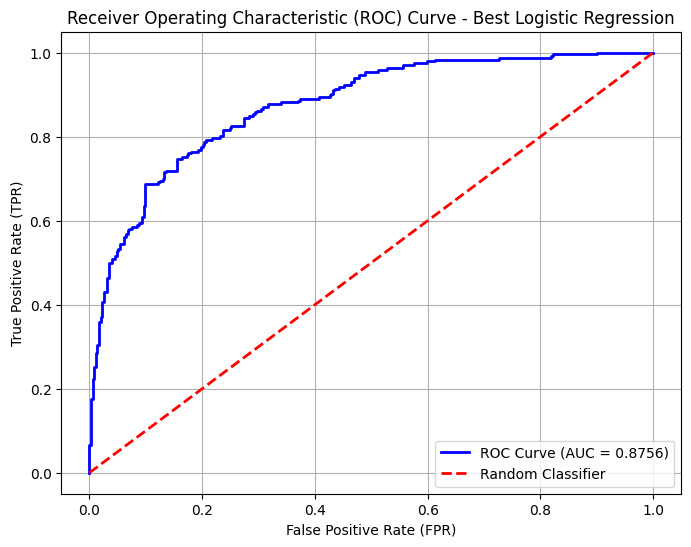

In [652]:
# Вычисляем точки для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best) # Вычисление точек ROC-кривой
# Создаём фигуру
plt.figure(figsize=(8, 6))
# Построим ROC-кривую
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_best:.4f})') # Построение основной кривой
# Добавим диагональную линию (случайная модель)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier') # Линия случайной модели
# Подписи осей
plt.xlabel('False Positive Rate (FPR)') # Подпись оси X
plt.ylabel('True Positive Rate (TPR)') # Подпись оси Y
# Добавим заголовок
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Logistic Regression') # Заголовок графика
# Добавим сетку
plt.grid(True) # Сетка
# Добавим легенду
plt.legend(loc="lower right") # Легенда
#Сохраняем график ROC-кривой
os.makedirs('figures/', exist_ok=True) # Создание папки figures, если её нет
plt.savefig('figures/roc_curve_best_logreg.png', dpi=300, bbox_inches='tight') # Сохранение графика
print("График ROC-кривой сохранён в 'figures/roc_curve_best_logreg.png'") # Подтверждение сохранения
# Показываем график
plt.show() # Отображение графика в ноутбуке

Создаем сводку результатов в табличном виде

In [653]:
# Создаем словарь с результатами для разных моделей
results_data = {
    'Model': ['Baseline (Most Frequent)', 'Logistic Regression (Best)'], # Названия моделей
    'Accuracy': [acc_baseline, acc_best], # Значения Accuracy
    'ROC-AUC': [auc_baseline, auc_best], # Значения ROC-AUC
    'Precision': ['N/A (Baseline)', precision_best], # Precision (для бейзлайна не применимо)
    'Recall': ['N/A (Baseline)', recall_best], # Recall (для бейзлайна не применимо)
    'F1-Score': ['N/A (Baseline)', f1_best] # F1-Score (для бейзлайна не применимо)
}
# Преобразуем словарь в pandas DataFrame для наглядного отображения <-- ЭТО создание таблички
results_df = pd.DataFrame(results_data)
# Печатаем таблицу результатов
print("Сравнение моделей:")
print(results_df)
# Выводим confusion matrix для лучшей модели
print("\nConfusion Matrix для лучшей логистической регрессии:")
print(cm_best)

Сравнение моделей:
                        Model  Accuracy   ROC-AUC       Precision  \
0    Baseline (Most Frequent)      0.59  0.500758  N/A (Baseline)   
1  Logistic Regression (Best)      0.80  0.875637        0.794393   

           Recall        F1-Score  
0  N/A (Baseline)  N/A (Baseline)  
1        0.691057         0.73913  

Confusion Matrix для лучшей логистической регрессии:
[[310  44]
 [ 76 170]]


Создаем текстовый отчет

In [654]:
print("Текстовый отчёт и выводы:")
# Сохраняем текстовый отчет в переменную
report_text = f"""Бейзлайн-модель (DummyClassifier с strategy='most_frequent') всегда предсказывает самый частый класс,
не анализируя признаки, и служит нижней границей качества.
Логистическая регрессия, напротив, обучается на данных и выявляет закономерности,
что позволяет ей значительно превосходить бейзлайн.
Accuracy выросла с {acc_baseline:.4f} до {acc_best:.4f}, а ROC-AUC — с {auc_baseline:.4f} до {auc_best:.4f},
что говорит о существенном улучшении способности модели различать классы.
При подборе параметра C в сетке [0.01, 0.1, 1.0, 10.0] было найдено оптимальное значение,
которое обеспечило лучший баланс между переобучением и недообучением.
Таким образом, логистическая регрессия является разумной моделью для этой задачи,
так как она проста, интерпретируема и показала значительное улучшение по сравнению с тривиальным подходом.
"""
# Печатаем текстовый отчет
print(report_text)


Текстовый отчёт и выводы:
Бейзлайн-модель (DummyClassifier с strategy='most_frequent') всегда предсказывает самый частый класс,
не анализируя признаки, и служит нижней границей качества.
Логистическая регрессия, напротив, обучается на данных и выявляет закономерности,
что позволяет ей значительно превосходить бейзлайн.
Accuracy выросла с 0.5900 до 0.8000, а ROC-AUC — с 0.5008 до 0.8756,
что говорит о существенном улучшении способности модели различать классы.
При подборе параметра C в сетке [0.01, 0.1, 1.0, 10.0] было найдено оптимальное значение,
которое обеспечило лучший баланс между переобучением и недообучением.
Таким образом, логистическая регрессия является разумной моделью для этой задачи,
так как она проста, интерпретируема и показала значительное улучшение по сравнению с тривиальным подходом.

